In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [51]:
def kernel(point,x):
  k = 1
  weights = np.mat(np.eye((m))) 
  for j in range(m):
    diff = point - X[j]
    weights[j,j] = np.exp(diff*diff.T/( -2.0*k** 2)) 
  return weights

def localWeight(point, x,Y) :
  wei = kernel(point,x )
  W = (X.T*(wei*X)).I*(X.T*(wei*Y.T)) 
  return W

def localWeightRegression(x,Y) : 
  ypred = np.zeros(m)
  for i in range(m):
    ypred[i] = x[i] *localWeight(x[i],x,Y) 
  return ypred

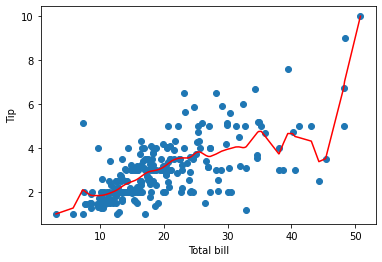

In [84]:
data = pd.read_csv('tips.csv') 

bill = np.array(data.total_bill) 
tip = np.array(data.tip)

m = len(bill)

X = np.mat([np.ones(m),bill]).T
y = np.mat(tip)

ypred = localWeightRegression(X,y) 

plt.scatter(bill,tip) 
plt.plot(np.sort(bill) ,ypred[[b for b in np.argsort(bill)]], color='red')

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()